In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [14]:
## Problem 1

for n in range(4):
    y = dn_sin(n)
    print("when n = ",n, "dn_sin(n) is", y)

when n =  0 dn_sin(n) is 0.0
when n =  1 dn_sin(n) is 1.0
when n =  2 dn_sin(n) is -0.0
when n =  3 dn_sin(n) is -1.0


In [13]:
def dn_sin(n):
    '''
    Compute the n^th derivative of sin(x) at x=0

    input:
    n - int: the order of the derivative to compute
    output:
    float nth derivative of sin(0)
    '''
    y = 0
    reminder = n%4
    if reminder == 0:
        y = np.sin(0)
    elif reminder == 1:
        y = np.cos(0)
    elif reminder == 2:
        y = -1*np.sin(0)
    else:
        y = -1*np.cos(0)   
    return y

In [49]:
## Problem 2
def taylor_sin(x,n):
    y = 0
    for i in range(int(n)):
        y_new = (dn_sin(i)*x**i) / math.factorial(i)
        y = y+y_new
        
    return y

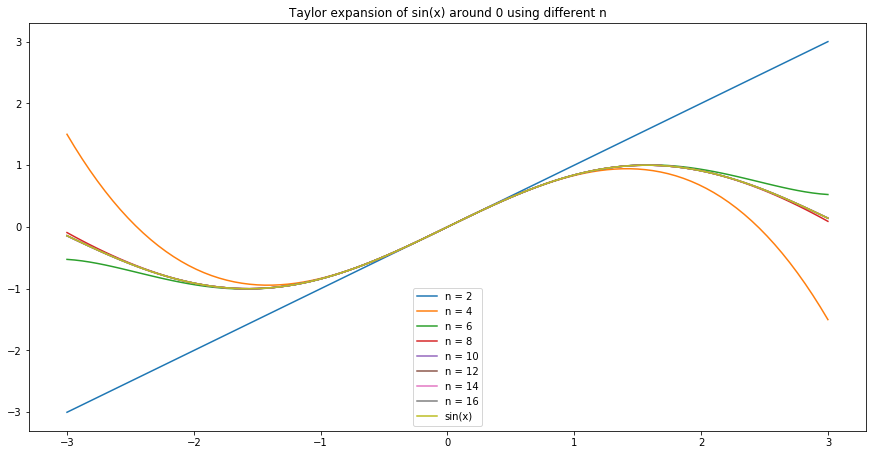

In [71]:
## Prolem 3
x_ = np.linspace(-3,3,101)
y_ = np.zeros((8,101))
n_ = np.linspace(2,16,8)

for i in range(len(n_)):  
    n = n_[i]
    
    for j in range(len(x_)):
        x = x_[j]
        y_[i][j] = taylor_sin(x,n)

        
## Plot
fig = plt.figure(figsize = (15,7.5))
for i in range(len(n_)):
    text = "n = " + str(int(n_[i]))
    plt.plot(x_,y_[i], label = text)

plt.plot(x_,np.sin(x_), label = "sin(x)")
plt.title("Taylor expansion of sin(x) around 0 using different n")
plt.legend()

In [ ]:
## Problem 4